In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.799130947323366


In [5]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


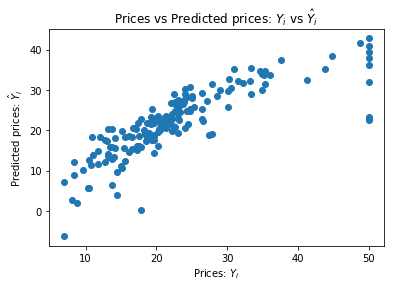

In [7]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lnr=LinearRegression()
lnr.fit(X_train,Y_train)

Y_pred = lnr.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [8]:
print(mean_squared_error(Y_test, lnr.predict(X_test)))

28.530458765974636


In [9]:
df=pd.DataFrame(X)

In [10]:
df.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517


In [11]:
type(X)

numpy.ndarray

In [12]:
X_train.shape

(339, 13)

In [13]:
Y_train[0]

13.4

In [211]:
from scipy.spatial import distance

def MyGD(X,Y,R):
   # W,b,iteration,r,k=np.zeros(shape=(1,13)),0,500,0.01,25
    W_curr=np.random.normal(0,1,13)
    b_curr=np.random.normal(0,1,1)
    W_prev=np.random.normal(0,1,13)
    b_prev=np.random.normal(0,1,1)
    iteration=700
    r=R
    m=2
    diff=2
    vect_index=0
    while iteration>0:
        x=X
        y=Y
        k=np.random.randint(1,len(Y))
        der_w=np.random.normal(0,1,13)
        der_b=np.random.normal(0,1,1)

        for i in range(len(Y)):
            der_w+=-2*x[i]*(y[i]-np.dot(W_prev,x[i])-b_prev)
            der_b+=-2*(y[i]-np.dot(W_prev,x[i])-b_prev)
        
        vect_index+=1
        W_curr=(W_prev-r*(der_w)/len(Y))
        b_curr=(b_prev-r*(der_b)/len(Y))
        iteration-=1
        
        if(W_curr==W_prev).all():
            break
        W_prev=W_curr
        b_prev=b_curr
        r=r/1.5
    return W_curr,b_curr

### Tuning of Stepsize

In [212]:
step=[.1,.2,.3,.4,.5,.6,.7]
for i in step:
    W,B=MyGD(X_train,Y_train,i)
    y_pred_test=[]
    for j in range(len(Y_test)):
        y_pred_test.append(np.dot(W,X_test[j])+B)
    print("mean square error for stepsize"+" "+str(i))
    print(mean_squared_error(Y_test,y_pred_test))

mean square error for stepsize 0.1
214.98050272540635
mean square error for stepsize 0.2
73.2153043764109
mean square error for stepsize 0.3
42.6755462693853
mean square error for stepsize 0.4
30.29253546454183
mean square error for stepsize 0.5
31.791714660278682
mean square error for stepsize 0.6
31.729204876606808
mean square error for stepsize 0.7
36.97683120664924


### So best step size will be b/w .3 and .4

In [219]:
W,B=MyGD(X_train,Y_train,.4)
print(W)

[-0.86356095  0.34564623 -0.11035499  0.17495341  0.01372091  3.48081128
 -0.8463758  -1.63619012  0.69658724 -0.87966089 -1.73567323  1.14484323
 -3.07444236]


In [220]:
y_pred_test=[]
for i in range(len(Y_test)):
    y_pred_test.append(np.dot(W,X_test[i])+B)

In [221]:
print(mean_squared_error(Y_test,y_pred_test))

31.91888587911096


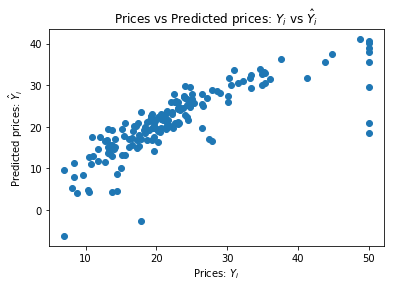

In [222]:
plt.scatter(Y_test, y_pred_test)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [223]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['weight vector normal','weight vector LinearRegression']
wighsgd=lnr.coef_
for i in range(13):
    x.add_row([W[i],wighsgd[i]])
print(x)

+----------------------+--------------------------------+
| weight vector normal | weight vector LinearRegression |
+----------------------+--------------------------------+
| -0.8635609494127099  |      -1.3437909550482032       |
| 0.34564622504965903  |       0.8981706698567102       |
| -0.11035498811964133 |      -0.1717709855261239       |
| 0.17495341264570208  |      0.19955351355735784       |
| 0.013720911458114512 |      -1.4987748789138848       |
|  3.4808112822891664  |       2.809577224215438        |
| -0.8463757962038493  |      -0.3262697676854425       |
|  -1.636190119698818  |       -2.878369676203384       |
|  0.6965872355764104  |       2.9728241663334996       |
| -0.8796608867144038  |      -2.2755074170077205       |
|  -1.735673227779166  |       -2.138724591239684       |
|  1.144843231238713   |       1.0998200798817204       |
| -3.0744423585805998  |      -3.3718450699392433       |
+----------------------+--------------------------------+


### Observations

#### 1)from the above table we can see that weight vector of both normal SGD and LinearRegression is quite same
#### 2)The mean sqared error of both the algorithms are also same as 28 and 32 of LR and SGD respectively.
#### 3)so we can say both sgd and normal algo can give same result even if we not consider complete element and take only k elements where 1<k <n.where n is total no element.
#### 4)The graph of Y vs predicted Y are also similar in  nature and shows a similar trend in both LR and SGD

In [2]:
mylist = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [3]:
mylist

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [4]:
mylist[0]

[1, 2, 3]

In [13]:
set(mylist)

TypeError: unhashable type: 'list'